In [1]:
%reload_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot


%matplotlib inline
plt.style.use("fivethirtyeight")

<IPython.core.display.Javascript object>

In [3]:
def get_95_ci(x1, x2):
    """Calculate a 95% CI for 2 1d numpy arrays"""
    signal = x1.mean() - x2.mean()
    noise = np.sqrt(x1.var() / x1.size + x2.var() / x2.size)

    ci_lo = signal - 1.96 * noise
    ci_hi = signal + 1.96 * noise

    return ci_lo, ci_hi


%matplotlib inline

<IPython.core.display.Javascript object>

In [4]:
stocks = pd.read_csv(r"C:\Users\GaukharJavarova\Downloads\aggdata.csv")
stocks.head()

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,netinccmn,fcfps,PX_TO_BOOK_RATIO,RETURN_ON_ASSET,OPER_MARGIN,CASH_FLOW_PER_SHARE,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET
0,ZYME,8269000.0,3.091,9007000.0,636578000.0,-3.765,-37487000.0,48686718.0,0.170,-35880000.0,...,-162932000.0,-2.154,3.091,-0.358217,-4.339098,-0.823549,0.181661,-16.467038,6.807722,0.014149
1,ZYME,1877000.0,7.288,6881000.0,368205000.0,-38.489,-36354000.0,43658717.0,0.043,-73752000.0,...,-145437000.0,-2.319,7.288,-0.409374,-39.292488,-0.922987,0.047655,-19.603277,3.647265,0.018688
2,ZYME,7860000.0,3.146,6755000.0,400037000.0,-3.877,-10880000.0,43445379.0,0.181,-33564000.0,...,-63920000.0,0.004,3.146,-0.197080,-4.270229,-0.277127,0.200204,6200.000000,6.678431,0.016886
3,ZYME,7882000.0,2.112,7829000.0,414547000.0,-3.689,-13317000.0,32837975.0,0.240,-29432000.0,...,-52196000.0,0.028,2.112,-0.191239,-3.734078,-0.415356,0.245839,785.714286,8.874183,0.018886
4,ZYME,11925000.0,3.048,8065000.0,238279000.0,-1.144,-21302000.0,32020437.0,0.372,-14553000.0,...,-28993000.0,0.616,3.048,-0.130571,-1.220377,-0.665162,0.372362,26.266234,6.440652,0.033847


<IPython.core.display.Javascript object>

In [5]:
stocks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40277 entries, 0 to 40276
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker                   40277 non-null  object 
 1   revenue                  39949 non-null  float64
 2   pb                       38433 non-null  float64
 3   debt                     39416 non-null  float64
 4   assets                   39416 non-null  float64
 5   netmargin                38980 non-null  float64
 6   ncfo                     39683 non-null  float64
 7   shareswa                 40072 non-null  float64
 8   sps                      39800 non-null  float64
 9   opinc                    39949 non-null  float64
 10  assetsc                  30302 non-null  float64
 11  liabilitiesc             30265 non-null  float64
 12  price                    38513 non-null  float64
 13  calendardate             40277 non-null  object 
 14  datekey               

<IPython.core.display.Javascript object>

In [6]:
stocks["debt"].describe() #how debt is distributed among all the companies. 
#count = 3.941600e+04 = 39.416,000,000
#mean = 2.017409e+10 = 20,174,090,000,000,000
#50% = 1.087250e+09 = 1.087,250,000,000,000    ???????????????????????????????????? check to make sure


count    3.941600e+04
mean     2.017409e+10
std      4.820675e+11
min      0.000000e+00
25%      2.277842e+08
50%      1.087250e+09
75%      3.610550e+09
max      2.090531e+13
Name: debt, dtype: float64

<IPython.core.display.Javascript object>

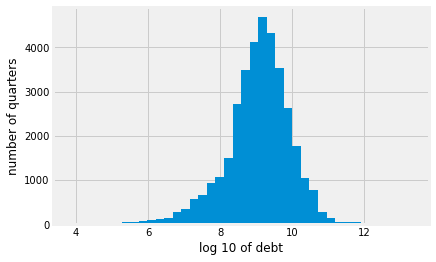

<IPython.core.display.Javascript object>

In [7]:
a = stocks["debt"].dropna()
b = a.apply(np.log10)
b[np.isfinite(b)].hist(bins=40)
plt.xlabel("log 10 of debt")
plt.ylabel("number of quarters")
plt.show()

In [8]:
stocks["debt_heavy"] = np.where(stocks["debt"] > 100000000, 1, 0)



<IPython.core.display.Javascript object>

In [9]:
stocks["assets_heavy"] = np.where(stocks["assets"] > 100000000, 1, 0)

<IPython.core.display.Javascript object>

In [10]:
df2018 = stocks[stocks["calendardate"] == "2018-03-31"]

<IPython.core.display.Javascript object>

In [11]:
df2018[["debt_heavy", "debt", "ticker", "calendardate", "assets"]].head()

,debt_heavy,debt,ticker,calendardate,assets
8,0,0.000000e+00,ZYME,2018-03-31,1.135380e+08
23,0,1.612400e+07,ZUO,2018-03-31,3.068060e+08
37,1,4.954000e+09,ZTS,2018-03-31,8.690000e+09
58,0,0.000000e+00,ZS,2018-03-31,4.055380e+08
72,0,0.000000e+00,ZNGA,2018-03-31,1.919011e+09


<IPython.core.display.Javascript object>

In [12]:
df2018["assets_heavy"].sum()  # total # of assets for df2018

1873

<IPython.core.display.Javascript object>

In [13]:
df2018["debt_heavy"].sum()  # total # of debt for df2018

1523

<IPython.core.display.Javascript object>

In [14]:
df2018.shape

(1985, 33)

<IPython.core.display.Javascript object>

In [25]:
df2018 = stocks[stocks["calendardate"] == "2018-03-31"]
df2019 = stocks[stocks["calendardate"] == "2019-03-31"]
df2019 = df2019.rename(
    columns={"debt": "debt2019", "calendardate": "calendardate2019", 'assets': 'assets2019', 'price': 
            'price2019'}
)


<IPython.core.display.Javascript object>

In [26]:
df2018 = pd.merge(
    df2018,
    df2019[["ticker", "debt2019", "calendardate2019", "assets2019", "price2019"]],
    how="inner",
    on="ticker",
)
df2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1984
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker                   1985 non-null   object 
 1   revenue                  1982 non-null   float64
 2   pb                       1858 non-null   float64
 3   debt                     1897 non-null   float64
 4   assets                   1897 non-null   float64
 5   netmargin                1922 non-null   float64
 6   ncfo                     1973 non-null   float64
 7   shareswa                 1977 non-null   float64
 8   sps                      1974 non-null   float64
 9   opinc                    1982 non-null   float64
 10  assetsc                  1455 non-null   float64
 11  liabilitiesc             1454 non-null   float64
 12  price                    1865 non-null   float64
 13  calendardate             1985 non-null   object 
 14  datekey                 

<IPython.core.display.Javascript object>

In [27]:
df2018 = df2018.dropna()


<IPython.core.display.Javascript object>

df2018["return_dif"] = (df2018["debt2019"] - df2018["debt"]) / df2018["debt"]
df2018 = df2018[df2018["return"] <= 2]
(100 * df2018["return"]).hist(bins=30)
plt.xlabel("return difference")
plt.ylabel("the number of observations")
plt.show()
print(stats.describe(df2018["return_dif"]))

# so i see it's close to 0, normal data, no differences in returns

In [28]:
df2018[df2018["debt_heavy"] == 1]

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET,debt_heavy,assets_heavy,debt2019,calendardate2019,assets2019,price2019
2,ZTS,1.366000e+09,20.675,4.954000e+09,8.690000e+09,0.258,3.890000e+08,4.859000e+08,2.811,4.640000e+08,...,2.815022,29.384236,2.597000,0.570081,1,1,6.578000e+09,2019-03-31,1.088300e+10,100.67
9,ZEN,1.297910e+08,12.352,4.399530e+08,1.112523e+09,-0.226,1.624200e+07,1.036920e+08,1.252,-3.361500e+07,...,1.255458,200.292887,3.026127,0.395455,1,1,5.787090e+08,2019-03-31,1.372678e+09,85.00
10,ZBRA,9.770000e+08,7.555,2.133000e+09,4.249000e+09,0.112,1.160000e+08,5.328625e+07,18.335,1.440000e+08,...,18.347406,17.576714,0.574034,0.502000,1,1,1.838000e+09,2019-03-31,4.576000e+09,209.53
11,ZBH,2.017600e+09,1.846,1.111190e+10,2.718120e+10,0.087,4.905000e+08,2.030000e+08,9.939,3.050000e+08,...,9.931728,16.436539,0.929742,0.408808,1,1,8.810600e+09,2019-03-31,2.428900e+10,127.70
12,ZAYO,6.490000e+08,5.501,5.828900e+09,9.241500e+09,0.036,2.628000e+08,2.481000e+08,2.616,1.059000e+08,...,2.616259,47.843137,0.881021,0.630731,1,1,6.049800e+09,2019-03-31,9.263800e+09,28.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,AAPL,6.113700e+10,6.710,1.218400e+11,3.675020e+11,0.226,1.513000e+10,5.024877e+09,12.167,1.589400e+10,...,12.049043,15.413872,1.235423,0.331536,1,1,1.126300e+11,2019-03-31,3.419980e+11,189.95
1979,AAP,2.873848e+09,2.164,1.044755e+09,8.614953e+09,0.048,1.539700e+08,7.397900e+07,38.847,1.982410e+08,...,38.847270,13.433454,0.361917,0.121272,1,1,2.800940e+09,2019-03-31,1.108151e+10,175.40
1982,AAL,1.040100e+10,-24.150,2.473900e+10,5.328000e+10,0.015,1.800000e+09,4.731387e+08,21.983,3.960000e+08,...,21.982984,-37.354421,0.434737,0.464321,1,1,3.344400e+10,2019-03-31,6.078700e+10,31.76
1983,AA,3.090000e+09,1.559,1.460000e+09,1.709600e+10,0.063,5.500000e+07,1.861756e+08,16.597,5.170000e+08,...,16.597233,10.502219,0.738239,0.085400,1,1,1.803000e+09,2019-03-31,1.595600e+10,28.16


<IPython.core.display.Javascript object>

In [29]:
df2018[df2018["assets_heavy"] == 1]

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET,debt_heavy,assets_heavy,debt2019,calendardate2019,assets2019,price2019
2,ZTS,1.366000e+09,20.675,4.954000e+09,8.690000e+09,0.258,3.890000e+08,485900000.0,2.811,464000000.0,...,2.815022,29.384236,2.597000,0.570081,1,1,6.578000e+09,2019-03-31,1.088300e+10,100.67
4,ZNGA,2.082320e+08,1.940,0.000000e+00,1.919011e+09,0.027,-3.947000e+06,869627000.0,0.239,4257000.0,...,0.238964,36.969697,3.170025,0.000000,0,1,1.291540e+08,2019-03-31,2.652126e+09,5.33
9,ZEN,1.297910e+08,12.352,4.399530e+08,1.112523e+09,-0.226,1.624200e+07,103692000.0,1.252,-33615000.0,...,1.255458,200.292887,3.026127,0.395455,1,1,5.787090e+08,2019-03-31,1.372678e+09,85.00
10,ZBRA,9.770000e+08,7.555,2.133000e+09,4.249000e+09,0.112,1.160000e+08,53286249.0,18.335,144000000.0,...,18.347406,17.576714,0.574034,0.502000,1,1,1.838000e+09,2019-03-31,4.576000e+09,209.53
11,ZBH,2.017600e+09,1.846,1.111190e+10,2.718120e+10,0.087,4.905000e+08,203000000.0,9.939,305000000.0,...,9.931728,16.436539,0.929742,0.408808,1,1,8.810600e+09,2019-03-31,2.428900e+10,127.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,AAP,2.873848e+09,2.164,1.044755e+09,8.614953e+09,0.048,1.539700e+08,73979000.0,38.847,198241000.0,...,38.847270,13.433454,0.361917,0.121272,1,1,2.800940e+09,2019-03-31,1.108151e+10,175.40
1980,AAON,9.908200e+07,8.534,0.000000e+00,3.069450e+08,0.043,1.074400e+07,52433902.0,1.890,5178000.0,...,1.889680,141.304348,1.352039,0.000000,0,1,0.000000e+00,2019-03-31,3.195250e+08,46.18
1982,AAL,1.040100e+10,-24.150,2.473900e+10,5.328000e+10,0.015,1.800000e+09,473138683.0,21.983,396000000.0,...,21.982984,-37.354421,0.434737,0.464321,1,1,3.344400e+10,2019-03-31,6.078700e+10,31.76
1983,AA,3.090000e+09,1.559,1.460000e+09,1.709600e+10,0.063,5.500000e+07,186175616.0,16.597,517000000.0,...,16.597233,10.502219,0.738239,0.085400,1,1,1.803000e+09,2019-03-31,1.595600e+10,28.16


<IPython.core.display.Javascript object>

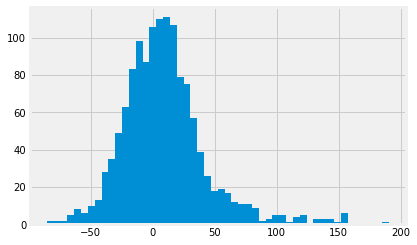

DescribeResult(nobs=1340, minmax=(-0.8544848484848484, 1.9018567639257293), mean=0.09442153640200235, variance=0.11888521649064611, skewness=1.144651524691345, kurtosis=3.1507116856549793)


<IPython.core.display.Javascript object>

In [30]:
df2018["return"] = (df2018["price2019"] - df2018["price"]) / df2018["price"]
df2018 = df2018[df2018["return"] <= 2]
(100 * df2018["return"]).hist(bins=50)
plt.show()
print(stats.describe(df2018["return"]))

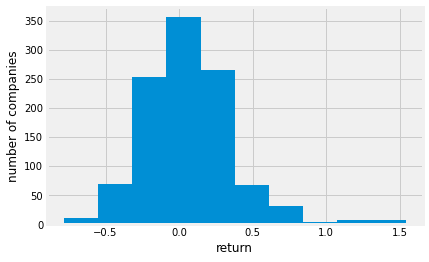

DescribeResult(nobs=1072, minmax=(-0.7831325301204819, 1.5393034825870644), mean=0.06910783854780926, variance=0.09460521545638996, skewness=1.058789238418703, kurtosis=3.1734354026521316)


<IPython.core.display.Javascript object>

In [32]:
debt_heavy = df2018[df2018["debt_heavy"] == 1]
plt.hist(debt_heavy["return"])  # what I'm plotting
plt.xlabel("return")  # what i chose to plot
plt.ylabel("number of companies")  # y is always count and numbers.
plt.show()
print(stats.describe(debt_heavy["return"]))

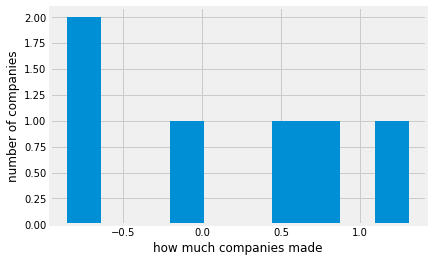

DescribeResult(nobs=6, minmax=(-0.8544848484848484, 1.310135135135135), mean=0.19644213341572211, variance=0.7605751619741887, skewness=-0.07714194180666062, kurtosis=-1.4917653460139138)


<IPython.core.display.Javascript object>

In [33]:
assets_heavy = df2018[df2018["assets_heavy"] == 0]
plt.hist(assets_heavy["return"])
plt.xlabel("how much companies made")
plt.ylabel("number of companies")

plt.show()
print(stats.describe(assets_heavy["return"]))

data is not normal and not normally distributed, so I use Wilcoxon test here. 

In [34]:
stats.wilcoxon((debt_heavy["price2019"] - debt_heavy["price"]))

WilcoxonResult(statistic=225669.0, pvalue=1.0312111365069994e-09)

<IPython.core.display.Javascript object>

In [35]:
stats.wilcoxon((assets_heavy["price2019"] - assets_heavy["price"]))

WilcoxonResult(statistic=10.0, pvalue=1.0)

<IPython.core.display.Javascript object>

significantly different.